# mAP vs Fraction of Training Data Plots

In [1]:
import boto3
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
s3 = boto3.resource('s3')
bucket_name = 'calvinandpogs-ee148'
bucket = s3.Bucket(bucket_name)

## mAP vs Fraction of Training Data

In [3]:
frac_pre = 'atrw/out/detection/yolov5/'
frac_post = 'runs/summaries.json'
frac_dirs = {1: 'test-m/05-26-2021-23-12-19/', 
            1/2: 'frac/test2/05-26-2021-23-50-02/', 
            1/4: 'frac/test4/05-26-2021-23-43-19/', 
            1/8: 'frac/test8/05-26-2021-23-36-44/', 
            1/16: 'frac/test16/05-26-2021-23-29-46/'}

In [4]:
data_frac = list(frac_dirs.keys())
mAP = []

for frac_dir in frac_dirs.values():
    dir_name = frac_pre + frac_dir + frac_post
    for obj in bucket.objects.filter(Prefix=dir_name):
        body = obj.get()['Body'].read()
        summary = json.loads(body.decode("utf-8"))
        mAP.append(summary['map_class'][0])

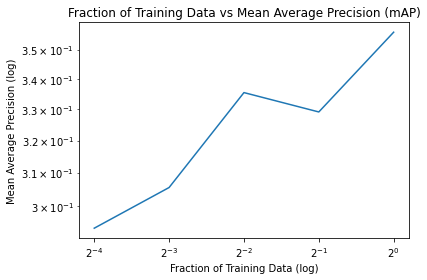

In [5]:
fig, ax = plt.subplots()
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=10)
plt.plot(data_frac, mAP)
ax.set_xlabel('Fraction of Training Data (log)')
ax.set_ylabel('Mean Average Precision (log)')
plt.title('Fraction of Training Data vs Mean Average Precision (mAP)')
plt.tight_layout()
fig.savefig('../figures/evaluation/map_datafraction.png', dpi=500)